### Loading data

In [1]:
import pandas as pd

movies = r"C:\Users\SujitSonar\Desktop\SimpliLearn\Python\Assessment\Data science with Python 1\movies.dat"
ratings=r"C:\Users\SujitSonar\Desktop\SimpliLearn\Python\Assessment\Data science with Python 1\ratings.dat"
users = r"C:\Users\SujitSonar\Desktop\SimpliLearn\Python\Assessment\Data science with Python 1\users.dat"

In [2]:
df_movies = pd.read_csv(movies,delimiter='::', header=None, names=['MovieID','Title','Genres'])
df_ratings = pd.read_csv(ratings,delimiter='::', header=None, names=['UserID','MovieID','Rating','Timestamp'])
df_users = pd.read_csv(users,delimiter='::', header=None, names=['UserID','Gender','Age','Occupation','Zip-code'])

C:\Users\SujitSonar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\SujitSonar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\SujitSonar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is s

In [3]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.shape

(3883, 3)

In [5]:
df_movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_ratings.shape

(1000209, 4)

In [8]:
df_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [9]:
df_ratings.sort_values('MovieID', inplace=True)

In [10]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
427702,2599,1,4,973796689
1966,18,1,4,978154768
683688,4089,1,5,965428947
596207,3626,1,4,966594018
465902,2873,1,5,972784317


In [11]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
df_users.shape

(6040, 5)

In [13]:
df_users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

### Merging datasets to create master dataset

In [14]:
# Merging movies and ratings

df_movies_ratings = pd.merge(df_ratings,df_movies, how='left', left_on='MovieID',right_on='MovieID')

In [15]:
df_movies_ratings.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,2599,1,4,973796689,Toy Story (1995),Animation|Children's|Comedy
1,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy
2,4089,1,5,965428947,Toy Story (1995),Animation|Children's|Comedy
3,3626,1,4,966594018,Toy Story (1995),Animation|Children's|Comedy
4,2873,1,5,972784317,Toy Story (1995),Animation|Children's|Comedy


In [16]:
df_movies_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
Title        0
Genres       0
dtype: int64

In [17]:
# Merging movies_ratings and users

df_movies_ratings_users = pd.merge(df_movies_ratings,df_users, how='left',left_on='UserID', right_on='UserID')

In [18]:
df_movies_ratings_users.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,2599,1,4,973796689,Toy Story (1995),Animation|Children's|Comedy,M,25,12,53154
1,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825
2,4089,1,5,965428947,Toy Story (1995),Animation|Children's|Comedy,M,25,7,79416
3,3626,1,4,966594018,Toy Story (1995),Animation|Children's|Comedy,M,25,17,75075
4,2873,1,5,972784317,Toy Story (1995),Animation|Children's|Comedy,F,18,4,64093


In [19]:
df_movies_ratings_users.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [20]:
# sorting the data
df_movies_ratings_users.sort_values(['UserID','MovieID'],ascending=[True,True], inplace=True)

In [21]:
df_movies_ratings_users.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
1949,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067
23186,1,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10,48067
41924,1,150,5,978301777,Apollo 13 (1995),Drama,F,1,10,48067
68619,1,260,4,978300760,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,F,1,10,48067
141694,1,527,5,978824195,Schindler's List (1993),Drama|War,F,1,10,48067


In [22]:
df_movies_ratings_users.describe(include='all')

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1000209,1000209,1.000209e+06,1.000209e+06,1000209
unique,NaN,NaN,NaN,NaN,3706,301,2,NaN,NaN,3439
top,NaN,NaN,NaN,NaN,American Beauty (1999),Comedy,M,NaN,NaN,94110
freq,NaN,NaN,NaN,NaN,3428,116883,753769,NaN,NaN,3802
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,NaN,NaN,NaN,2.973831e+01,8.036138e+00,NaN
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,NaN,NaN,NaN,1.175198e+01,6.531336e+00,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,NaN,NaN,NaN,2.500000e+01,2.000000e+00,NaN
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,NaN,NaN,NaN,2.500000e+01,7.000000e+00,NaN
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,NaN,NaN,NaN,3.500000e+01,1.400000e+01,NaN


In [23]:
df_movies_ratings_users['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
sorted(df_movies_ratings_users['Age'].unique())

[1, 18, 25, 35, 45, 50, 56]

In [25]:
# creating age group table

value = [1, 18, 25, 35, 45, 50, 56]
description =["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
data = list(zip(value,description))
df_age = pd.DataFrame(data, columns=['Age','Age_Group'])
df_age

,Age,Age_Group
0,1,Under 18
1,18,18-24
2,25,25-34
3,35,35-44
4,45,45-49
5,50,50-55
6,56,56+


In [26]:
sorted(df_movies_ratings_users['Occupation'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [27]:
# creating Occupation  group table

occupation_value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
occupation_desc =['other or not specified',
'academic/educator',
'artist',
'clerical/admin',
'college/grad student',
'customer service',
'doctor/health care',
'executive/managerial',
'farmer',
'homemaker',
'K-12 student',
'lawyer',
'programmer',
'retired',
' sales/marketing',
'scientist',
' self-employed',
'technician/engineer',
'tradesman/craftsman',
'unemployed',
'writer'
]

data1 = list(zip(occupation_value,occupation_desc))

df_occupation_desc = pd.DataFrame(data1, columns=['Occupation','Occupation_Desc'])

df_occupation_desc

,Occupation,Occupation_Desc
0,0,other or not specified
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


In [28]:
df_movies_ratings_users = pd.merge(df_movies_ratings_users,df_age, how='left', left_on ='Age', right_on='Age')

In [29]:
df_movies_ratings_users.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,Age_Group
0,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,Under 18
1,1,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10,48067,Under 18
2,1,150,5,978301777,Apollo 13 (1995),Drama,F,1,10,48067,Under 18
3,1,260,4,978300760,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,F,1,10,48067,Under 18
4,1,527,5,978824195,Schindler's List (1993),Drama|War,F,1,10,48067,Under 18


In [30]:
df_movies_ratings_users= pd.merge(df_movies_ratings_users,df_occupation_desc,how='left',left_on='Occupation', right_on='Occupation')

In [31]:
df_movies_ratings_users.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,Age_Group,Occupation_Desc
0,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,Under 18,K-12 student
1,1,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10,48067,Under 18,K-12 student
2,1,150,5,978301777,Apollo 13 (1995),Drama,F,1,10,48067,Under 18,K-12 student
3,1,260,4,978300760,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,F,1,10,48067,Under 18,K-12 student
4,1,527,5,978824195,Schindler's List (1993),Drama|War,F,1,10,48067,Under 18,K-12 student


In [32]:
df1=df_movies_ratings_users[['MovieID','Title']].drop_duplicates()
#df1=df_movies_ratings_users[['MovieID','Title']]

In [33]:
df1.shape

(3706, 2)

In [34]:
df1.sort_values('MovieID').head()

,MovieID,Title
0,1,Toy Story (1995)
800,2,Jumanji (1995)
3369,3,Grumpier Old Men (1995)
555,4,Waiting to Exhale (1995)
3371,5,Father of the Bride Part II (1995)


## Q1:Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [35]:
df_Master_Data = df_movies_ratings_users[['MovieID','Title','Genres','UserID','Age','Age_Group','Gender','Occupation','Occupation_Desc','Rating']]

In [36]:
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,Under 18,F,10,K-12 student,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,Under 18,F,10,K-12 student,5
2,150,Apollo 13 (1995),Drama,1,1,Under 18,F,10,K-12 student,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,Under 18,F,10,K-12 student,4
4,527,Schindler's List (1993),Drama|War,1,1,Under 18,F,10,K-12 student,5


In [37]:
df_Master_Data['Movie_Year']= df_Master_Data['Title'].str.extract(r"\(([0-9]+)\)", expand=False)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_Master_Data.shape

(1000209, 11)

In [39]:
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating,Movie_Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,Under 18,F,10,K-12 student,5,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,Under 18,F,10,K-12 student,5,1995
2,150,Apollo 13 (1995),Drama,1,1,Under 18,F,10,K-12 student,5,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,Under 18,F,10,K-12 student,4,1977
4,527,Schindler's List (1993),Drama|War,1,1,Under 18,F,10,K-12 student,5,1993


In [40]:
#convert the string values to numeric
df_Master_Data['Movie_Year'] = pd.to_datetime(df_Master_Data['Movie_Year'], format='%Y')

C:\Users\SujitSonar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating,Movie_Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,Under 18,F,10,K-12 student,5,1995-01-01
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,Under 18,F,10,K-12 student,5,1995-01-01
2,150,Apollo 13 (1995),Drama,1,1,Under 18,F,10,K-12 student,5,1995-01-01
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,Under 18,F,10,K-12 student,4,1977-01-01
4,527,Schindler's List (1993),Drama|War,1,1,Under 18,F,10,K-12 student,5,1993-01-01


In [42]:
df_Master_Data.describe(include='object')

,Title,Genres,Age_Group,Gender,Occupation_Desc
count,1000209,1000209,1000209,1000209,1000209
unique,3706,301,7,2,21
top,American Beauty (1999),Comedy,25-34,M,college/grad student
freq,3428,116883,395556,753769,131032


In [43]:
df_Master_Data['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

## Q2. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

    User Age Distribution
    User rating of the movie “Toy Story”
    Top 25 movies by viewership rating
    Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\SujitSonar\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


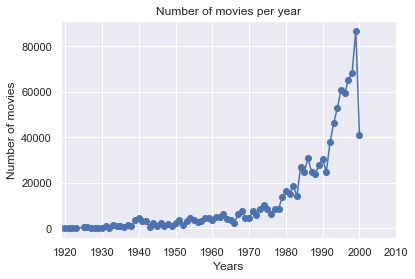

In [45]:
#Number of Movies by year
movie_year = pd.DataFrame(df_Master_Data['Title'].groupby(df_Master_Data['Movie_Year']).count())

movie_year.reset_index(inplace=True)

X=movie_year['Movie_Year']
Y=movie_year['Title']

plt.plot_date(X,Y,'bo-')
plt.grid(True)
plt.rcParams["figure.figsize"] = (15,5)
plt.title('Number of movies per year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.xlim('1919-01-01','2010-01-01')
plt.show()

In [46]:
print(movie_year.sort_values('Title', ascending=False).head())
print(movie_year.sort_values('Movie_Year', ascending=False).head(2))

   Movie_Year  Title
79 1999-01-01  86833
78 1998-01-01  68226
77 1997-01-01  65402
75 1995-01-01  60754
76 1996-01-01  59382
   Movie_Year  Title
80 2000-01-01  41000
79 1999-01-01  86833


### Observations:
    * In this dataset we see that highest number of movies were produced in 1999 - 86833 movies
    *The decades between 1980 to 2000 we saw highest year or year increase in number of movies produced
    * we see a sudden fall in the number of movies produced  in 2000, from 86833 movies in 1999 to 41000, this is perhaps we do not have the full data for 2000 or may be need more analysis

### User Demography

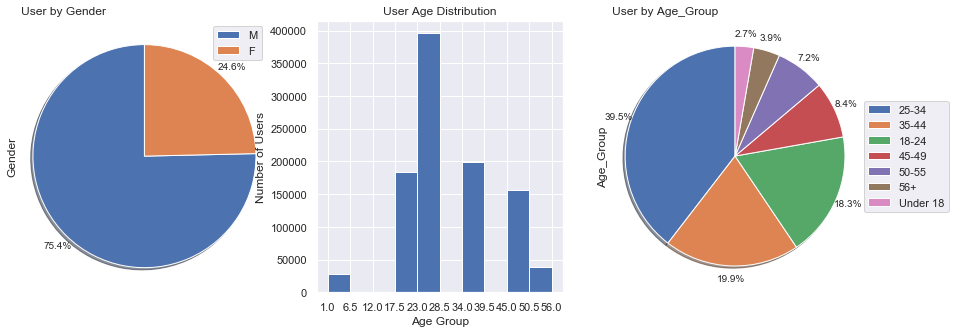

In [47]:
plt.subplot(1, 3, 1)
(df_Master_Data['Gender'].value_counts()).plot(kind='pie', 
                        figsize =(15,5), 
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                       labels=None,
                       pctdistance=1.12)

plt.title('User by Gender',loc='left')

plt.axis('equal') 
plt.legend(labels=(df_Master_Data['Gender'].value_counts()).index, loc='upper right')

plt.subplot(1, 3, 2)
count, bin_edges = np.histogram(df_Master_Data['Age'])

df_Master_Data['Age'].plot(kind='hist', figsize=(15, 5), xticks=bin_edges)

plt.title('User Age Distribution') # add a title to the histogram
plt.ylabel('Number of Users') # add y-label
plt.xlabel('Age Group') # add x-label

plt.subplot(1, 3, 3)
(df_Master_Data['Age_Group'].value_counts()).plot(kind='pie', 
                        figsize =(15,5), 
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                       labels=None,
                       pctdistance=1.12)

plt.title('User by Age_Group',loc='left')

plt.axis('equal') 
plt.legend(labels=(df_Master_Data['Age_Group'].value_counts()).index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

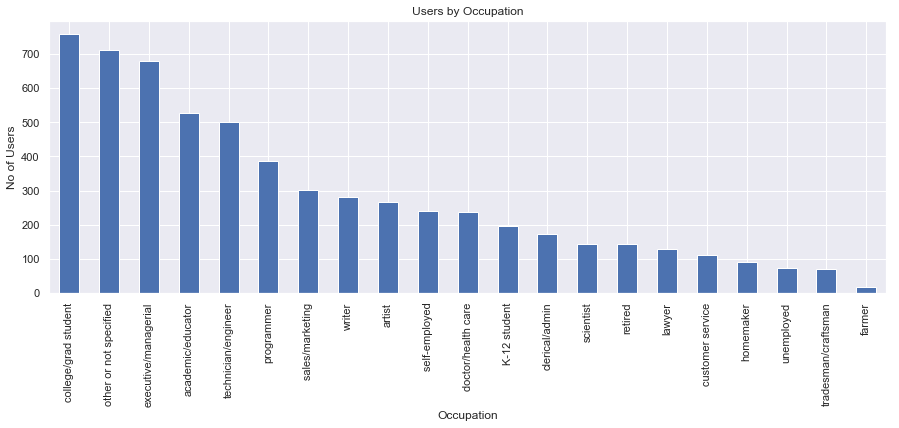

In [48]:
df_occupation=df_Master_Data[['Occupation_Desc','UserID']].drop_duplicates()
df_occupation.groupby(['Occupation_Desc']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('Users by Occupation')
plt.ylabel('No of Users')
plt.xlabel('Occupation')
plt.show()

In [49]:
#df_occupation['Occupation_Desc'].value_counts(normalize=True)

### Observations:
    * Given dataset user population is predominantly male users (75.4%)
    * User Age Distribution:
        * Highest number of users fall under the age group of 25-34 years (39.5%
        * we do not have many users under 18 and above 56 years of age
    * Majority of the users fall under below category
        * College/grad students
        * executive/managerial
        * academic/educator
        * technician/engineer

### Most Watched Movies

In [50]:
### Checking number of users rating for each movie
title_ratings = df_Master_Data.groupby(['Title']).size()
title_ratings_df = pd.DataFrame(title_ratings)
title_ratings_df.reset_index(inplace=True)
title_ratings_df.rename(columns={0:'No_of_ratings'}, inplace=True)

print(title_ratings_df[title_ratings_df['No_of_ratings']<100].count())
print(title_ratings_df[title_ratings_df['No_of_ratings']>=100].count())
print(title_ratings_df.shape)
print(1687+2019)

Title            1687
No_of_ratings    1687
dtype: int64
Title            2019
No_of_ratings    2019
dtype: int64
(3706, 2)
3706


#### Observations: 
    * we see that around 1687 unique movies has less than 100 user rating
    * only 2019 unique moves has >= 100 users rating the movie

In [51]:
# dropping the list of movies where we have less than 100 users rating the movie
title_ratings_df.sort_values('No_of_ratings').head()

,Title,No_of_ratings
185,Another Man's Poison (1952),1
2365,Night Tide (1961),1
2951,Shadows (Cienie) (1988),1
2121,"McCullochs, The (1975)",1
179,Anna (1996),1


In [52]:
df_Master_Data.shape

(1000209, 11)

In [53]:
#copy of df
df_100plus_Ratings_data = df_Master_Data.copy()

#groupby df
df_100plus_Ratings_data['No_of_rating']=df_100plus_Ratings_data.groupby(['Title'])['Rating'].transform('count')

#filtering df
df_100plus_Ratings_data=df_100plus_Ratings_data.sort_values('No_of_rating', ascending=False)
df_100plus_Ratings_data=df_100plus_Ratings_data[df_100plus_Ratings_data['No_of_rating']>=100]
print(df_100plus_Ratings_data.shape)
df_100plus_Ratings_data.head()

(942225, 12)


,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating,Movie_Year,No_of_rating
801892,2858,American Beauty (1999),Comedy|Drama,4803,25,25-34,F,16,self-employed,5,1999-01-01,3428
51856,2858,American Beauty (1999),Comedy|Drama,341,56,56+,F,13,retired,5,1999-01-01,3428
779765,2858,American Beauty (1999),Comedy|Drama,4656,25,25-34,M,17,technician/engineer,5,1999-01-01,3428
723200,2858,American Beauty (1999),Comedy|Drama,4332,25,25-34,F,3,clerical/admin,5,1999-01-01,3428
302291,2858,American Beauty (1999),Comedy|Drama,1794,25,25-34,M,11,lawyer,1,1999-01-01,3428


###### Observations: 
    * reduced the data from 1000209 rows to 942225 rows
    * data contains movies that has atleast 100 users rating a movie

In [54]:
# TOP 10 most viwed movies
df_top10_movies=df_100plus_Ratings_data.groupby(['Title','Gender'])[['UserID']].count().unstack().reset_index()
df_top10_movies.columns = df_top10_movies.columns.droplevel()
df_top10_movies.rename(columns={'':'Title'}, inplace=True)
df_top10_movies['Total_Viewers'] = df_top10_movies['F'] + df_top10_movies['M']
df_c=df_top10_movies[['Title','Total_Viewers']].sort_values('Total_Viewers', ascending=False).head(10).reset_index()

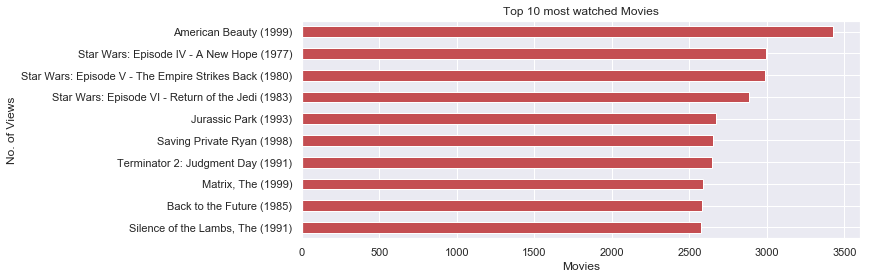

In [55]:
ax=df_c[['Title','Total_Viewers']].plot(kind='barh',x='Title', figsize=(10,4), color='r')

ax.set_title('Top 10 most watched Movies')
ax.set_xlabel('Movies')
ax.set_ylabel ('No. of Views')
ax.legend().set_visible(False)
ax.invert_yaxis()

plt.show()

##### Observations:
    * American beauty (1999) appears to be the most watched movie amongst male and female users

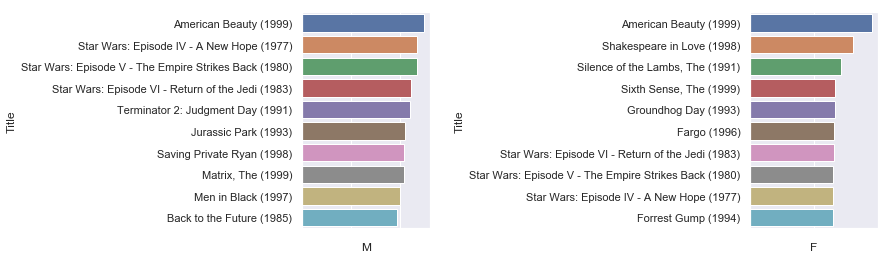

In [56]:
# Top 10 most viwed movies by Gender

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

ax0=sns.barplot(y='Title',x='M',data = df_top10_movies[['Title','M']],
           order=df_top10_movies[['Title','M']].sort_values('M',ascending = False).head(10).Title,ax=axs[0])
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")


ax1=sns.barplot(y='Title',x='F',data = df_top10_movies[['Title','F']],
           order=df_top10_movies[['Title','F']].sort_values('F',ascending = False).head(10).Title,ax=axs[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")

#fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=0.9, 
                    top=0.9, 
                    wspace=2.5, 
                    hspace=0.4)
plt.show()

### Observations:
    * American beauty (1999) appears to be the most watched movie amongst male and female users
    * top 10 most watched movies fall under action,sci-fi, Comedy, Drama and Romance

In [57]:
#####################################

### Genres

In [58]:
df_100plus_Ratings_data['Genres'].value_counts().head(10)

Comedy                     107708
Drama                       97012
Comedy|Romance              40722
Comedy|Drama                40101
Drama|Romance               26491
Action|Thriller             26426
Horror                      18846
Action|Adventure|Sci-Fi     17705
Drama|Thriller              17132
Thriller                    15679
Name: Genres, dtype: int64

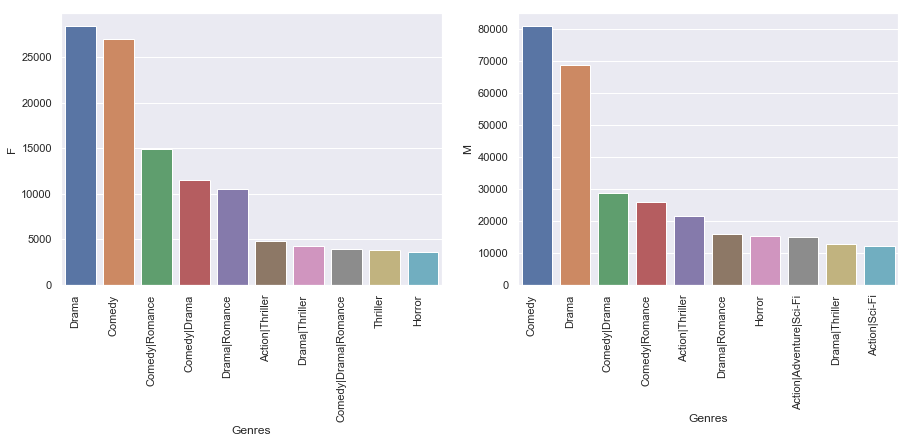

In [59]:
sns.set()
df_genres_by_gender_top10 =df_100plus_Ratings_data.groupby(['Genres','Gender'])['MovieID'].count().unstack().reset_index()
# among females
df_genres_by_Female_top10=df_genres_by_gender_top10[['Genres','F']].sort_values('F', ascending=False).head(10)
# among males
df_genres_by_Male_top10=df_genres_by_gender_top10[['Genres','M']].sort_values('M', ascending=False).head(10)

#Plotting
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

ax0=sns.barplot(x='Genres',y='F',data = df_genres_by_Female_top10,
           order=df_genres_by_Female_top10.sort_values('F',ascending = False).Genres,ax=axs[0])
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")


ax1=sns.barplot(x='Genres',y='M',data = df_genres_by_Male_top10,
           order=df_genres_by_Male_top10.sort_values('M',ascending = False).Genres,ax=axs[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")

plt.show()

### Observations:
    * Top 10 most viewed movies among Male viewers fall under Action and Sci-Fi, however if we look at the overall viewership,Comedy  appears to be most popular amongst male viewers
    * Top 10 most viewed movies among Female viewers fall under Comedy, Drama and Rommance genres


In [60]:
########################################################

### Rating

In [61]:
print(df_100plus_Ratings_data.shape)
df_100plus_Ratings_data.head()

(942225, 12)


,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating,Movie_Year,No_of_rating
801892,2858,American Beauty (1999),Comedy|Drama,4803,25,25-34,F,16,self-employed,5,1999-01-01,3428
51856,2858,American Beauty (1999),Comedy|Drama,341,56,56+,F,13,retired,5,1999-01-01,3428
779765,2858,American Beauty (1999),Comedy|Drama,4656,25,25-34,M,17,technician/engineer,5,1999-01-01,3428
723200,2858,American Beauty (1999),Comedy|Drama,4332,25,25-34,F,3,clerical/admin,5,1999-01-01,3428
302291,2858,American Beauty (1999),Comedy|Drama,1794,25,25-34,M,11,lawyer,1,1999-01-01,3428


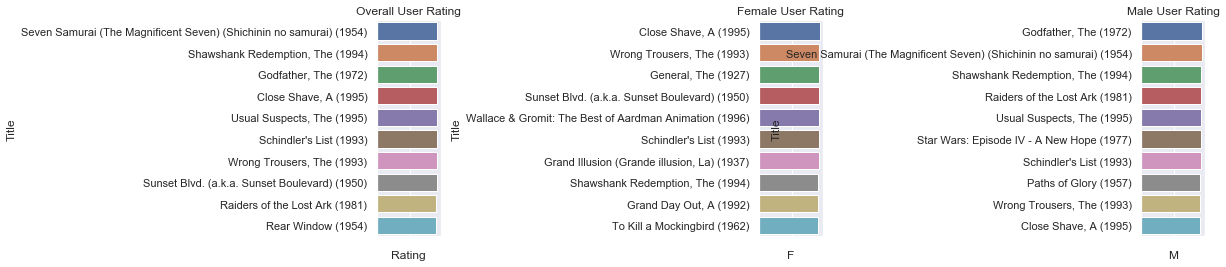

In [62]:
# Top 10 Average movie rating by user

df_Top10_user_rating= df_100plus_Ratings_data.groupby(['Title'])[['Rating']].mean().reset_index().sort_values('Rating', ascending=False).head(10)
df_Top10_user_rating

df_gender_rating= df_100plus_Ratings_data.groupby(['Title','Gender'])[['Rating']].mean().unstack().reset_index()
df_gender_rating.columns=df_gender_rating.columns.droplevel()
df_gender_rating.rename(columns={'':'Title'}, inplace=True)

# Top 10 Average movie rating by female user
df_female_rating = df_gender_rating[['Title','F']].sort_values('F', ascending=False).head(10)
df_female_rating

# Top 10 Average movie rating by male user
df_male_rating = df_gender_rating[['Title','M']].sort_values('M', ascending=False).head(10)
df_male_rating

#Plotting
fig, axs = plt.subplots(ncols=3, figsize=(5,5))
ax0=sns.barplot(x='Rating',y='Title',data = df_Top10_user_rating,
           order=df_Top10_user_rating.sort_values('Rating',ascending = False).Title,ax=axs[0])
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90, ha="right")
ax0.set_title('Overall User Rating')

ax1=sns.barplot(x='F',y='Title',data = df_female_rating,
           order=df_female_rating.sort_values('F',ascending = False).Title,ax=axs[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax1.set_title('Female User Rating')

ax2=sns.barplot(x='M',y='Title',data = df_male_rating,
           order=df_male_rating.sort_values('M',ascending = False).Title,ax=axs[2])
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2.set_title('Male User Rating')

plt.subplots_adjust(left=0.2,
                    bottom=0.3, 
                    right=2.5, 
                    top=0.9, 
                    wspace=5, 
                    hspace=0.)


plt.show()


##### Top 25 movies by viewership rating

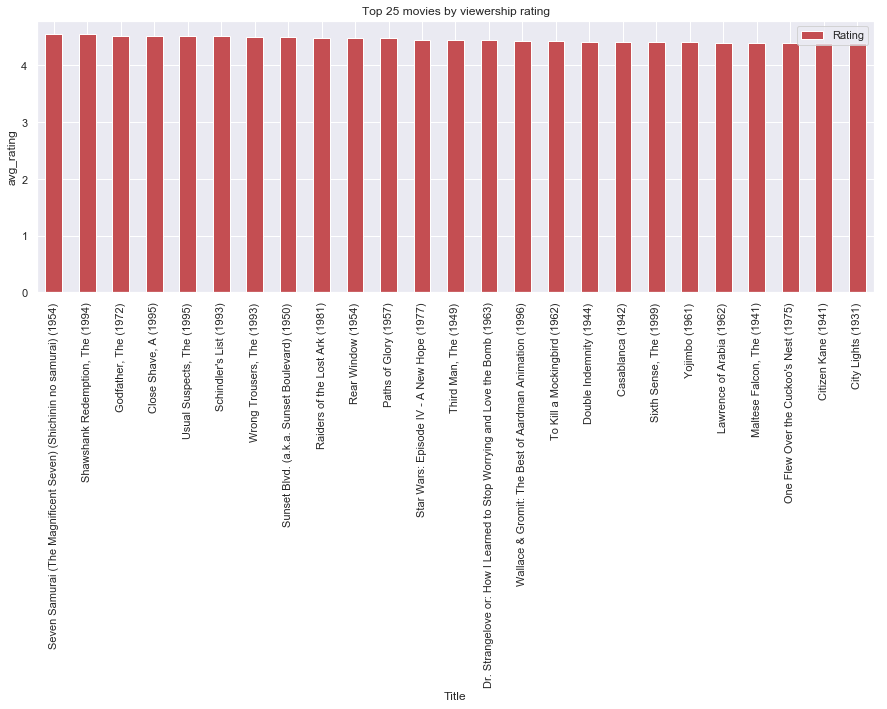

In [63]:
#Top 25 movies by viewership rating
top25_user_rating_movies=df_100plus_Ratings_data.groupby(['Title'])[['Rating']].mean().reset_index().sort_values('Rating', ascending=False).head(25)
top25_user_rating_movies.plot(kind='bar', x='Title', color='r')
plt.title('Top 25 movies by viewership rating')
plt.ylabel('avg_rating')
plt.show()

##### User rating of the movie “Toy Story”

In [64]:
# User rating of the movie “Toy Story”

df_toystory = df_100plus_Ratings_data[df_100plus_Ratings_data['Title']=='Toy Story (1995)']

df_toystory['Rating'].mean()

4.146846413095811

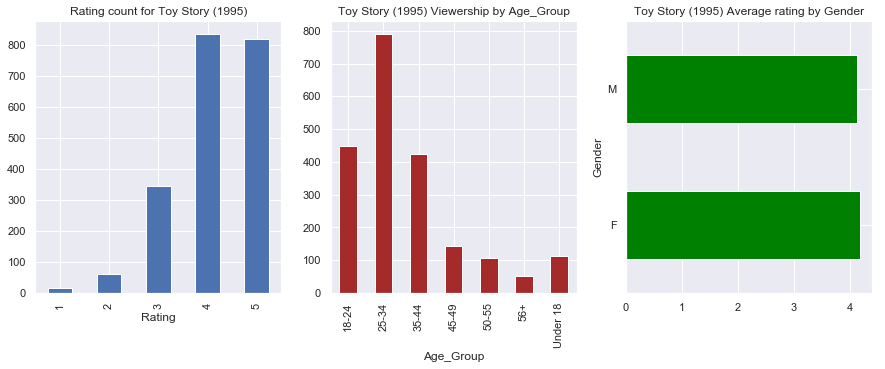

In [65]:
plt.subplot(1, 3, 1)
df_toystory.groupby(['Rating']).size().plot(kind='bar')
plt.title('Rating count for Toy Story (1995)')

plt.subplot(1, 3, 2)
df_toystory.groupby(['Age_Group']).size().plot(kind='bar', color='brown')
plt.title('Toy Story (1995) Viewership by Age_Group')

plt.subplot(1, 3, 3)
df_toystory.groupby(['Gender'])['Rating'].mean().plot(kind='barh', color='green')
plt.title('Toy Story (1995) Average rating by Gender')

plt.show()

##### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [66]:
df_userid_2696 = df_100plus_Ratings_data[df_100plus_Ratings_data['UserID']==2696]
df_userid_2696=df_userid_2696[['Title','Rating']].sort_values('Rating', ascending=False).set_index('Title')
df_userid_2696

,Rating
Title,
Lone Star (1996),5
Midnight in the Garden of Good and Evil (1997),4
Basic Instinct (1992),4
Psycho (1998),4
"Perfect Murder, A (1998)",4
Wild Things (1998),4
L.A. Confidential (1997),4
Palmetto (1998),4
"Devil's Advocate, The (1997)",4


In [67]:
#############################################

#### Rating by Gender

# Q3: Feature Engineering:

    Use column genres:
        * Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
        * Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
        * Determine the features affecting the ratings of any particular movie.
        * Develop an appropriate model to predict the movie ratings


In [68]:
genres_list = df_Master_Data['Genres'].to_list()
print(type(genres_list))
genres_list[0:5]

<class 'list'>


["Animation|Children's|Comedy",
 "Animation|Children's|Musical|Romance",
 'Drama',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Drama|War']

In [69]:
g_list=[]
for genre in  genres_list:
    g_list.append(genre.split(sep='|'))

flat_list = []
for sublist in g_list:
    for item in sublist:
        flat_list.append(item)
        
final_genres =list(set(flat_list))
final_genres

['Animation',
 'Thriller',
 'Adventure',
 'Sci-Fi',
 'Romance',
 'Fantasy',
 'Action',
 'War',
 "Children's",
 'Drama',
 'Film-Noir',
 'Musical',
 'Crime',
 'Mystery',
 'Horror',
 'Comedy',
 'Western',
 'Documentary']

In [71]:
# finding the frequency of the words appear in the Genres and visualing using wordcloud
from wordcloud import WordCloud, STOPWORDS

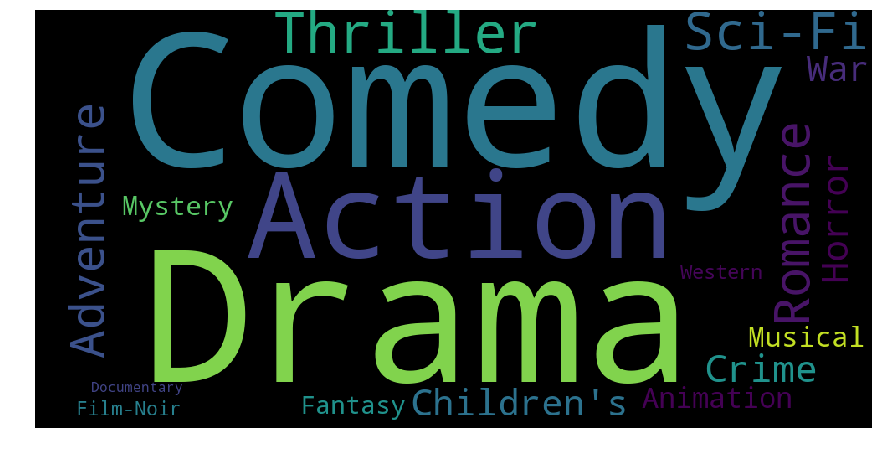

In [72]:
from collections import Counter
word_could_dict=Counter(flat_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Observations:
    * Comedy, Drama and Action appears to be the most popular genres among the users

##### * Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [75]:
df_Master_Data.head()
df_Master_Data['Genres_extract'] = df_Master_Data['Genres'].

,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating,Movie_Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,Under 18,F,10,K-12 student,5,1995-01-01
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,Under 18,F,10,K-12 student,5,1995-01-01
2,150,Apollo 13 (1995),Drama,1,1,Under 18,F,10,K-12 student,5,1995-01-01
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,Under 18,F,10,K-12 student,4,1977-01-01
4,527,Schindler's List (1993),Drama|War,1,1,Under 18,F,10,K-12 student,5,1993-01-01


In [103]:
df_genres= df_Master_Data['Genres'].str.get_dummies('|')
df_genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [104]:
### Merging the dataset with the Genre encoded data

df_Master_Data_Genre_encoded = pd.concat([df_Master_Data, df_genres], axis=1)

In [105]:
df_Master_Data_Genre_encoded.head()

,MovieID,Title,Genres,UserID,Age,Age_Group,Gender,Occupation,Occupation_Desc,Rating,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,Under 18,F,10,K-12 student,5,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,1,Under 18,F,10,K-12 student,5,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,1,Under 18,F,10,K-12 student,5,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,1,Under 18,F,10,K-12 student,4,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,1,Under 18,F,10,K-12 student,5,...,0,0,0,0,0,0,0,0,1,0


In [110]:
# top 6 genres by the total number of movies

top6_genre  = df_Master_Data_Genre_encoded.iloc[:,11:-1].sum().sort_values(ascending=False).head(6).index.values


In [111]:
top6_genre

array(['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi', 'Romance'],
      dtype=object)

In [134]:
genre_groups = (df_Master_Data_Genre_encoded.iloc[:, 10:].groupby('Movie_Year').sum()
               ).loc['1980-01-01':'2000-01-01',top6_genre]
               

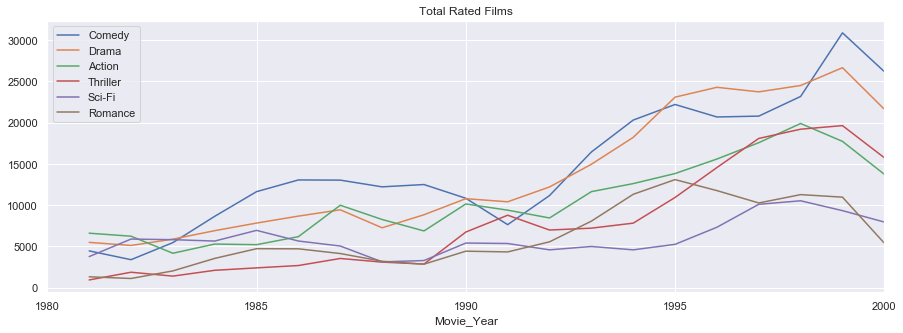

In [137]:
# graph showing a 2-year moving average of the total volume of rated films
genre_groups.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Rated Films")

#### Observations:
    * Comedy, Drama and Action appears to be the most rated genres among the users

In [ ]:
genre_groups_rating = (df_Master_Data_Genre_encoded.iloc[:, 10:].groupby('Movie_Year').sum()
               ).loc['1980-01-01':'2000-01-01',top6_genre]

In [146]:
genre_groups_rating = df_Master_Data_Genre_encoded[['Rating','Comedy','Drama','Action','Thriller','Sci-Fi','Romance']]

In [147]:
genre_groups_rating.head()

,Rating,Comedy,Drama,Action,Thriller,Sci-Fi,Romance
0,5,1,0,0,0,0,0
1,5,0,0,0,0,0,1
2,5,0,1,0,0,0,0
3,4,0,0,1,0,1,0
4,5,0,1,0,0,0,0


In [148]:
genre_groups_ratings = (genre_groups_rating.groupby('Rating').mean()
                       .loc['1':'5',top6_genre])
               

,Comedy,Drama,Action,Thriller,Sci-Fi,Romance
Rating,,,,,,
1,0.384804,0.215651,0.294282,0.179460,0.196746,0.112988
2,0.381872,0.271056,0.292236,0.197625,0.187370,0.141776
3,0.371160,0.324740,0.270784,0.191913,0.164213,0.154780
4,0.353654,0.377713,0.248098,0.191443,0.145445,0.153136
5,0.324908,0.426976,0.230600,0.182970,0.143348,0.141660


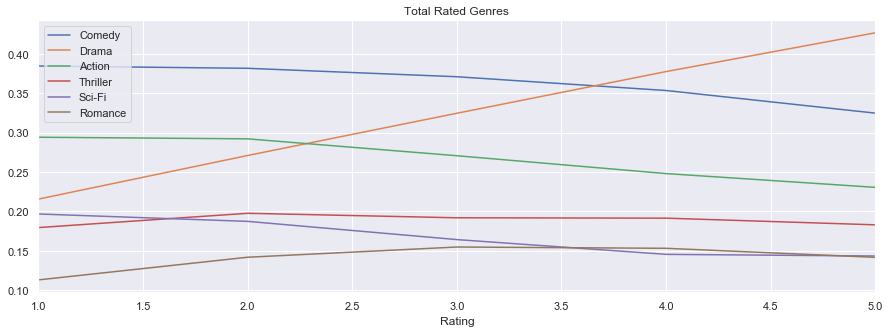

In [151]:
genre_groups_ratings.plot(figsize=(15,5),
                                    title="Total Rated Genres")

#### Observations:
    * Drama ratings appears to be on high trend among the users

###   Determine the features affecting the ratings of any particular movie.

In [383]:
df_movie = df_Master_Data_Genre_encoded[['Age_Group','Gender','Occupation','Rating']]
df_movie.head()

,Age_Group,Gender,Occupation,Rating
0,Under 18,F,10,5
1,Under 18,F,10,5
2,Under 18,F,10,5
3,Under 18,F,10,4
4,Under 18,F,10,5


In [384]:
df_movie.shape

(1000209, 4)

In [314]:
df_movie.isnull().sum()

Age_Group     0
Gender        0
Occupation    0
Rating        0
dtype: int64

In [385]:
Age_dummies = pd.get_dummies(df_movie['Age_Group'], prefix = 'Age')
Gender_dummies = pd.get_dummies(df_movie['Gender'], prefix = 'Sex')
Occupation_dummies = pd.get_dummies(df_movie['Occupation'], prefix = 'Occupa')
Occupation_dummies.head()

,Occupa_0,Occupa_1,Occupa_2,Occupa_3,Occupa_4,Occupa_5,Occupa_6,Occupa_7,Occupa_8,Occupa_9,...,Occupa_11,Occupa_12,Occupa_13,Occupa_14,Occupa_15,Occupa_16,Occupa_17,Occupa_18,Occupa_19,Occupa_20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [386]:
Age_dummies.head()

,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_56+,Age_Under 18
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [387]:
Gender_dummies.head()

,Sex_F,Sex_M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [388]:
df_movie_model = pd.concat([df_movie, Age_dummies], axis = 1)
df_movie_model = pd.concat([df_movie_model, Gender_dummies], axis = 1)
df_movie_model = pd.concat([df_movie_model, Occupation_dummies], axis = 1)
df_movie_model.drop(columns =['Age_Group','Gender','Occupation','Sex_F','Age_56+','Occupa_20'], inplace=True)
df_movie_model.head()

,Rating,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_Under 18,Sex_M,Occupa_0,Occupa_1,...,Occupa_10,Occupa_11,Occupa_12,Occupa_13,Occupa_14,Occupa_15,Occupa_16,Occupa_17,Occupa_18,Occupa_19
0,5,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [389]:
df_movie_model.columns

Index(['Rating', 'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-49',
       'Age_50-55', 'Age_Under 18', 'Sex_M', 'Occupa_0', 'Occupa_1',
       'Occupa_2', 'Occupa_3', 'Occupa_4', 'Occupa_5', 'Occupa_6', 'Occupa_7',
       'Occupa_8', 'Occupa_9', 'Occupa_10', 'Occupa_11', 'Occupa_12',
       'Occupa_13', 'Occupa_14', 'Occupa_15', 'Occupa_16', 'Occupa_17',
       'Occupa_18', 'Occupa_19'],
      dtype='object')

In [390]:
df_movie_model.corr()

,Rating,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,Age_Under 18,Sex_M,Occupa_0,Occupa_1,...,Occupa_10,Occupa_11,Occupa_12,Occupa_13,Occupa_14,Occupa_15,Occupa_16,Occupa_17,Occupa_18,Occupa_19
Rating,1.000000,-0.031400,-0.026304,0.016327,0.015277,0.033267,-0.004797,-0.019861,-0.015264,-0.001346,...,-0.006757,0.004644,0.015972,0.021159,0.007509,0.014845,0.002951,0.008029,-0.005093,-0.018443
Age_18-24,-0.031400,1.000000,-0.383431,-0.236262,-0.143199,-0.132516,-0.079278,-0.001234,-0.046957,-0.080358,...,-0.020650,-0.045420,-0.024321,-0.055977,-0.015688,-0.029230,-0.064635,-0.056773,-0.007583,0.037354
Age_25-34,-0.026304,-0.383431,1.000000,-0.403096,-0.244318,-0.226090,-0.135259,0.029043,0.064205,0.000790,...,-0.124206,0.010604,0.043148,-0.095505,0.043670,0.048090,-0.052635,0.016868,-0.010606,0.003373
Age_35-44,0.016327,-0.236262,-0.403096,1.000000,-0.150544,-0.139312,-0.083344,-0.002563,-0.012122,0.004782,...,-0.071936,0.011750,0.013864,-0.042763,0.008938,0.000596,0.053284,0.039207,0.006082,-0.026982
Age_45-49,0.015277,-0.143199,-0.244318,-0.150544,1.000000,-0.084438,-0.050515,-0.029368,-0.028500,0.070140,...,-0.046640,0.029261,-0.006283,0.000340,-0.024894,-0.009940,0.037857,0.031633,0.034195,-0.023438
Age_50-55,0.033267,-0.132516,-0.226090,-0.139312,-0.084438,1.000000,-0.046746,-0.001819,0.018582,0.027553,...,-0.043160,0.026949,-0.022758,0.070270,-0.033108,-0.019144,0.066677,-0.011908,0.001767,-0.023335
Age_Under 18,-0.004797,-0.079278,-0.135259,-0.083344,-0.050515,-0.046746,1.000000,-0.030272,0.005360,-0.035989,...,0.775607,-0.022929,-0.029389,-0.018533,-0.033847,-0.025628,-0.036726,-0.045464,-0.018495,0.055267
Sex_M,-0.019861,-0.001234,0.029043,-0.002563,-0.029368,-0.001819,-0.030272,1.000000,-0.005453,-0.095535,...,-0.019149,0.039626,0.072863,0.011751,0.001191,0.022575,0.043191,0.091912,0.054446,0.003814
Occupa_0,-0.015264,-0.046957,0.064205,-0.012122,-0.028500,0.018582,0.005360,-0.005453,1.000000,-0.118316,...,-0.059810,-0.056121,-0.095414,-0.045740,-0.088020,-0.059363,-0.085070,-0.108542,-0.042840,-0.047641
Occupa_1,-0.001346,-0.080358,0.000790,0.004782,0.070140,0.027553,-0.035989,-0.095535,-0.118316,1.000000,...,-0.047161,-0.044252,-0.075236,-0.036066,-0.069406,-0.046808,-0.067079,-0.085587,-0.033780,-0.037566


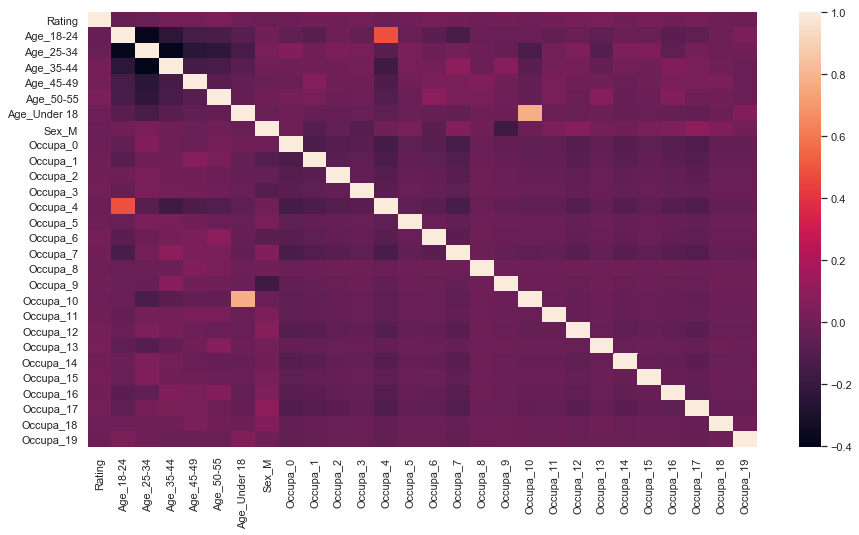

In [391]:
plt.figure(figsize=(15,8))
sns.heatmap(df_movie_model.corr())

#### Observations:
    * based on all the fields of the dataset, it appears Occupation, Age and Gender are the most influential features
    * However looking at the corelation, we do see that, these features does not have a strong corelation with Rating
    * Looking at the Heatmap, we can probably take, Age_18-24, Age_35-34,Age_35_44,sex_M,Occupa_0,Occupa_1,Occupa_4,
      Occupa_7

### Develop an appropriate model to predict the movie ratings

In [402]:
#selecting a 10% sample of the data
df_movie_model_sample=df_movie_model.sample(frac=0.1, replace=False, random_state=1)
df_movie_model_sample.shape

(100021, 28)

In [403]:
# Age, gender , Occupation and rating

features_df = df_movie_model_sample.drop(columns = ['Rating'])
labels = df_movie_model_sample['Rating']

In [404]:
features_df.reset_index(inplace=True)
features_df.drop(['index'],axis=1, inplace=True)

labels=labels.reset_index()
labels.drop(['index'],axis=1, inplace=True)


In [407]:
print(features_df.shape)
print(labels.shape)

(100021, 27)
(100021, 1)


In [409]:
# predicting rating using Age, gender and Occupation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000000)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

# print the first 30 true and predicted responses
print ('actual:    ', y_test.values[0:10])
print ('predicted: ', y_pred[0:10])

### Evaluating our Model
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


actual:     [[4]
 [3]
 [4]
 [2]
 [3]
 [3]
 [4]
 [5]
 [1]
 [4]]
predicted:  [4 4 4 4 4 4 4 4 4 4]


0.34175359082880663

In [411]:
# predicting using Age_18-24', 'Age_25-34', 'Age_35-44',sex_M,Occupa_0,Occupa_1,Occupa_4,Occupa_7

features_df1 = features_df[['Age_18-24', 'Age_25-34', 'Age_35-44', 'Sex_M','Occupa_0','Occupa_1','Occupa_4','Occupa_7']]
labels1=labels.reset_index()
labels1.drop(['index'],axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_df1, labels1, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(max_iter=1000000)

logreg1.fit(X_train1,y_train1)

y_pred1 = logreg1.predict(X_test1)

print ('actual:    ', y_test1.values[0:10])
print ('predicted: ', y_pred1[0:10])

from sklearn import metrics
metrics.accuracy_score(y_test1,y_pred1)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


actual:     [[4]
 [3]
 [4]
 [2]
 [3]
 [3]
 [4]
 [5]
 [1]
 [4]]
predicted:  [4 4 4 4 4 4 4 4 4 4]


0.34155363748458695

In [412]:
# age and rating
features_df2 = features_df[['Age_18-24', 'Age_25-34', 'Age_35-44', 'Sex_M']]

labels2=labels.reset_index()
labels2.drop(['index'],axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_df2, labels2, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(max_iter=1000000)

logreg2.fit(X_train2,y_train2)

y_pred2 = logreg2.predict(X_test2)

print ('actual:    ', y_test2.values[0:10])
print ('predicted: ', y_pred2[0:10])

from sklearn import metrics
metrics.accuracy_score(y_test2,y_pred2)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


actual:     [[4]
 [3]
 [4]
 [2]
 [3]
 [3]
 [4]
 [5]
 [1]
 [4]]
predicted:  [4 4 4 4 4 4 4 4 4 4]


0.34155363748458695

In [413]:
#gender and rating
features_df3 = features_df[[ 'Sex_M']]

labels3=labels.reset_index()
labels3.drop(['index'],axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(features_df3, labels3, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(max_iter=1000000)

logreg3.fit(X_train3,y_train3)

y_pred3 = logreg3.predict(X_test3)

print ('actual:    ', y_test3.values[0:10])
print ('predicted: ', y_pred3[0:10])

from sklearn import metrics
metrics.accuracy_score(y_test3,y_pred3)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


actual:     [[4]
 [3]
 [4]
 [2]
 [3]
 [3]
 [4]
 [5]
 [1]
 [4]]
predicted:  [4 4 4 4 4 4 4 4 4 4]


0.34155363748458695

### Observations:
    * using just Gender or Age or occupation, we see the accuracy of the model remains approximately the same
    * the the best accuracy score is 34%